## Vertices of a rectangle

In [16]:
# This code computes the vertices of a rectangle given a normal vector to the plane and one point on the plane

import numpy as np

# Define the normal vector and a point on the plane
normal = np.array([1, 0, 0])
point_on_plane = np.array([0, 0, 0])

# Normalize the normal vector
normal = normal / np.linalg.norm(normal)

# Compute two orthogonal vectors that lie on the plane
v1 = np.array([0, 1, 0])
v2 = np.cross(normal, v1)
v2 /= np.linalg.norm(v2)
v1 = np.cross(v2, normal)

# Define the length and width of the rectangle
length = 2
width = 1

# Compute the half-length and half-width
half_length = length / 2
half_width = width / 2

# Compute the center point of the rectangle
center = point_on_plane + half_length * v1 + half_width * v2

# Compute the vertices of the rectangle
vertex1 = center + half_length * v1 + half_width * v2
vertex2 = center + half_length * v1 - half_width * v2
vertex3 = center - half_length * v1 - half_width * v2
vertex4 = center - half_length * v1 + half_width * v2

print(vertex1, vertex2, vertex3, vertex4)


[0. 2. 1.] [0. 2. 0.] [0. 0. 0.] [0. 0. 1.]


## Discretization

In [17]:
import numpy as np

# Define the size of the continuous plane
width = 10
height = 10

# Define the size of the grid of cells
n_cells_x = 5
n_cells_y = 5

# Compute the size of each cell
cell_size_x = width / n_cells_x
cell_size_y = height / n_cells_y

# Create a grid of cell centers
cell_centers_x = np.linspace(cell_size_x/2, width-cell_size_x/2, n_cells_x)
cell_centers_y = np.linspace(cell_size_y/2, height-cell_size_y/2, n_cells_y)
cell_centers = np.meshgrid(cell_centers_x, cell_centers_y)
cell_centers = np.stack(cell_centers, axis=-1)

# Display the cell centers
print(cell_centers)


[[[1. 1.]
  [3. 1.]
  [5. 1.]
  [7. 1.]
  [9. 1.]]

 [[1. 3.]
  [3. 3.]
  [5. 3.]
  [7. 3.]
  [9. 3.]]

 [[1. 5.]
  [3. 5.]
  [5. 5.]
  [7. 5.]
  [9. 5.]]

 [[1. 7.]
  [3. 7.]
  [5. 7.]
  [7. 7.]
  [9. 7.]]

 [[1. 9.]
  [3. 9.]
  [5. 9.]
  [7. 9.]
  [9. 9.]]]


## Point inside of polygon

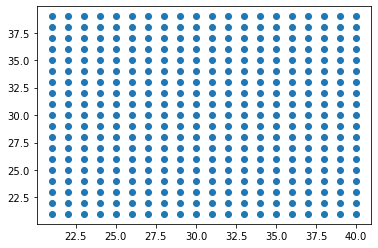

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def point_inside_polygon(x, y, poly):
    """Return True if the point x, y is inside the polygon defined by the list of vertices poly."""
    n = len(poly)
    inside = False

    p1x, p1y = poly[0]
    for i in range(n+1):
        p2x, p2y = poly[i % n]
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        x_inters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                    if p1x == p2x or x <= x_inters:
                        inside = not inside
        p1x, p1y = p2x, p2y

    return inside

# Define polygon vertices
poly_vertices = np.array([[20, 20], [20, 40], [40, 40], [40, 20]])

# Define meshgrid
x = np.arange(0, 60)
y = np.arange(0, 40)
xx, yy = np.meshgrid(x, y)

# Get points inside polygon
points_inside = []
for i in range(len(x)):
    for j in range(len(y)):
        if point_inside_polygon(xx[j,i], yy[j,i], poly_vertices):
            points_inside.append([xx[j,i], yy[j,i]])

points_inside = np.array(points_inside)
# print(points_inside)

plt.scatter(points_inside[:,0],points_inside[:,1])
plt.show()

## CODE FOR PROJECTIING A 2D MESHGRID POINT ONTO A 3D PLANE

In [19]:
import numpy as np

# Define intrinsic and extrinsic parameters of the camera
focal_length = 50
image_size = (640, 480)
principal_point = (320, 240)
camera_position = np.array([0, 0, 5])
camera_orientation = np.array([0, 0, 0])

# Define the 3D plane
plane_normal = np.array([0, 0, 1])
plane_point = np.array([0, 0, 0])

# Compute the projection matrix
K = np.array([[focal_length, 0, principal_point[0]], [0, focal_length, principal_point[1]], [0, 0, 1]])
R = np.eye(3)
t = -np.dot(R, camera_position)
P = np.dot(K, np.hstack((R, t.reshape(3,1))))

# Generate 2D meshgrid
x_range = np.linspace(0, image_size[0], num=image_size[0])
y_range = np.linspace(0, image_size[1], num=image_size[1])
X, Y = np.meshgrid(x_range, y_range)

# Project 2D meshgrid onto 3D plane
points_2d = np.vstack((X.flatten(), Y.flatten(), np.ones(X.size)))
points_3d = np.dot(np.linalg.inv(P), points_2d)
t = -(plane_normal.dot(plane_point))
d = (plane_normal.dot(points_3d) + t) / plane_normal.dot(plane_normal)
points_3d_on_plane = points_3d - d*np.vstack((plane_normal, plane_normal, plane_normal))

# Plot 3D points
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points_3d_on_plane[0], points_3d_on_plane[1], points_3d_on_plane[2])
plt.show()


LinAlgError: Last 2 dimensions of the array must be square

## Intersection between a plane and a line

In [ ]:
import numpy as np

# Define the plane using 4 points
p1 = np.array([0, 0, 0])
p2 = np.array([2, 0, 0])
p3 = np.array([2, 0, 2])
p4 = np.array([0, 0, 2])

n = np.cross(p2-p1, p3-p1)  # Compute normal vector of the plane

# Define the line using two points
q1 = np.array([1, 2, 1])
q2 = np.array([1, 1, 1])

d = q2 - q1  # Compute direction vector of the line

# Compute scalar parameter t
t = np.dot(n, p1 - q1) / np.dot(n, d)

# Compute intersection point
intersect = q1 + t * d

print("Intersection point:", intersect)


## Plot a rectangular parallelepiped

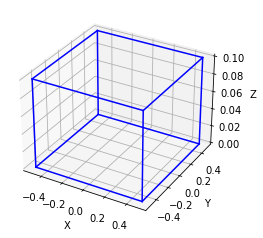

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the 8 vertices of the rectangular parallelepiped
vertices = np.array([
    (-0.5, -0.5, 0), 
    (-0.5, 0.5, 0), 
    (0.5, 0.5, 0), 
    (0.5, -0.5, 0),     
    (-0.5, -0.5, 0.1),
    (-0.5, 0.5, 0.1),
    (0.5, 0.5, 0.1),
    (0.5, -0.5, 0.1)      
    ])

# Define the 12 edges of the rectangular parallelepiped
edges = np.array([(0, 1), (1, 2), (2, 3), (3, 0), (4, 5), (5, 6), (6, 7), (7, 4), (0, 4), (1, 5), (2, 6), (3, 7)])

# Plot the rectangular parallelepiped
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for edge in edges:
    ax.plot3D(vertices[edge, 0], vertices[edge, 1], vertices[edge, 2], 'blue')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# POINT SPREAD FUNCTION

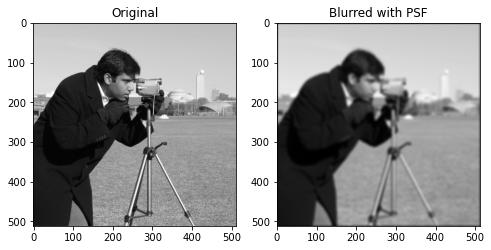

In [5]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from skimage import data
from scipy.stats import norm

# Load the image
img = data.camera()

# Generate a 7x7 PSF with a normal distribution
x, y = np.meshgrid(np.arange(11), np.arange(11))
center = 5.5  # center of the distribution
sigma = 3.5   # standard deviation of the distribution
psf = norm.pdf(np.sqrt((x-center)**2 + (y-center)**2), 0, sigma)
psf /= psf.sum()  # normalize the PSF to sum to 1

# Convolve the image with the PSF
blurred = signal.convolve2d(img, psf, mode='same')

# Plot the original image and the blurred image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(img, cmap='gray')
ax1.set_title('Original')
ax2.imshow(blurred, cmap='gray')
ax2.set_title('Blurred with PSF')
plt.show()


## Silicon substrate responsivity

In [ ]:
import numpy as np

# Define constants
h = 6.62607015e-34   # Planck's constant (J.s)
c = 299792458        # Speed of light (m/s)
e = 1.602176634e-19  # Elementary charge (C)

# Define spectral quantum efficiency (QE) data
wavelengths = np.linspace(400e-9, 700e-9, 301)  # wavelength range from 400 to 700 nm
qe = np.random.rand(301)                        # example QE data (dimensionless)

# Compute spectral responsivity
R = (h * c / wavelengths) * qe * 100 / e

# Plot the results
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(wavelengths*1e9, R)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Spectral Responsivity (A/W)')
ax.set_title('Example Spectral Responsivity Calculation')
plt.show()



In [ ]:
import numpy as np
import scipy.constants as const

# Define constants
h = const.h  # Planck's constant
c = const.c  # speed of light
e = const.e  # elementary charge

# Define wavelength range
wavelengths = np.arange(400, 701) * 1e-9  # wavelengths from 400 nm to 700 nm

# Calculate spectral responsivity
QE = 0.8  # quantum efficiency of silicon
responsivity = (h * c) / (e * wavelengths) * QE

# Plot responsivity
import matplotlib.pyplot as plt
plt.plot(wavelengths*1e9, responsivity)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Responsivity (A/W)')
plt.show()


# Bayern filter 4x4

In [ ]:
import numpy as np

# Define the Bayer filter pattern
bayer_filter = np.array([[0, 1, 1, 2],
                         [1, 0, 2, 1],
                         [1, 2, 0, 1],
                         [2, 1, 1, 0]])

# Define the color filter transmission values
red_transmission = 1.0
green_transmission = 0.5
blue_transmission = 0.2

# Define the color filter array
cfa = np.zeros((4, 4, 3))

# Assign color filter transmission values based on the Bayer filter pattern
cfa[bayer_filter == 0, 0] = red_transmission
cfa[bayer_filter == 1, 1] = green_transmission
cfa[bayer_filter == 2, 2] = blue_transmission

# Print the color filter array
print(cfa)
This code defines the Bayer filter pattern as a 4x4 array of integers, with each integer corresponding to a particular CFE. It then defines the color filter transmission values for red, green, and blue light, and creates a 3D color filter array with the same shape as the Bayer filter pattern. The code then assigns the appropriate transmission values to each element of the color filter array based on the Bayer filter pattern.

Note that in this example, we assume that the Bayer filter pattern is RGGB, so the CFEs at indices [0, 0] and [1, 1] are green, the CFEs at indices [0, 1] and [1, 0] are red, and the CFEs at indices [0, 2] and [1, 3] are green, and so on. If you want to use a different Bayer pattern, you can modify the bayer_filter array accordingly.





User
chat. create a numpy code for the baryern filter from XY number of pixels 
ChatGPT
Sure! Here's an example code for creating a Bayer filter with an XY size specified by the num_pixels variable using NumPy:

python
Copy code
import numpy as np

# Define the Bayer filter pattern for a 2x2 block
bayer_block = np.array([[0, 1], [1, 2]])

# Create a Bayer filter pattern for the entire image
num_blocks_x = num_pixels[1] // 2
num_blocks_y = num_pixels[0] // 2

bayer_filter = np.tile(bayer_block, (num_blocks_y, num_blocks_x))

# Create an empty color filter array
cfa = np.zeros((num_pixels[0], num_pixels[1], 3))

# Define the color filter transmission values
red_transmission = 1.0
green_transmission = 0.5
blue_transmission = 0.2

# Assign color filter transmission values based on the Bayer filter pattern
cfa[bayer_filter == 0, 0] = red_transmission
cfa[bayer_filter == 1, 1] = green_transmission
cfa[bayer_filter == 2, 2] = blue_transmission

# Print the color filter array
print(cfa)
This code first defines a 2x2 Bayer filter pattern bayer_block. It then calculates the number of 2x2 blocks needed to cover the entire image based on the num_pixels variable, and creates a Bayer filter pattern for the entire image by tiling the bayer_block pattern accordingly.

The code then creates an empty color filter array with the same dimensions as the image and assigns the appropriate color filter transmission values to each element based on the Bayer filter pattern.

Note that in this example, we assume that the Bayer filter pattern is RGGB, so the CFEs at indices [0, 0] and [1, 1] are green, the CFEs at indices [0, 1] and [1, 0] are red, and the CFEs at indices [0, 2] and [1, 3] are green, and so on. If you want to use a different Bayer pattern, you can modify the bayer_block array accordingly.





User
char, how create a big matrix from a 4x4 smaller matrix ?
ChatGPT
To create a big matrix from a 4x4 smaller matrix using NumPy, you can use the tile() function. Here's an example code:

python
Copy code
import numpy as np

# Create a 4x4 matrix
small_matrix = np.array([[1, 2, 3, 4],
                         [5, 6, 7, 8],
                         [9, 10, 11, 12],
                         [13, 14, 15, 16]])

# Use tile() to create a 16x16 matrix from the 4x4 matrix
big_matrix = np.tile(small_matrix, (4, 4))

# Print the big matrix
print(big_matrix)
In this example, we create a 4x4 matrix small_matrix. We then use the tile() function to create a 16x16 matrix big_matrix by tiling the small_matrix four times in both the horizontal and vertical directions.

The first argument of tile() is the input array to be tiled, and the second argument is a tuple that specifies the number of times to repeat the input array along each axis. In this case, we want to repeat the small_matrix four times in both the vertical and horizontal directions, so we pass (4, 4) as the second argument.

After creating the big_matrix, we print it to verify that it has the expected size and content.





User
hi chat, how are you ?
ChatGPT
Hello! As an artificial intelligence language model, I don't have feelings, but I'm always ready to assist you with your queries. How can I help you today?





User
chat, in real digital cameras, each color channel is composed by a optical filter and a photodetector ?
ChatGPT
Yes, that's correct. In a typical digital camera, each color channel (red, green, and blue) is created by using an optical filter in front of a photodetector. The filter allows only a specific color of light to pass through and reach the photodetector, which converts the light into an electrical signal that can be processed by the camera's image processing circuitry.

In a typical color filter array (CFA), which is the most common approach used in digital cameras to capture color images, the red, green, and blue filters are arranged in a repeating pattern over the sensor. The most popular CFA pattern is the Bayer pattern, which consists of a 2x2 grid of color filters arranged as follows:

css
Copy code
R   G
G   B
Each cell in this grid represents a pixel on the sensor, and each pixel records the intensity of the color that was allowed to pass through the filter placed in front of it. The image processing circuitry in the camera then uses interpolation algorithms to estimate the color values for all pixels based on the neighboring pixels, ultimately producing a full-color image.





User
and does the optical color filter have quantum efficiency ?
ChatGPT
Yes, the optical color filters used in digital cameras do have a spectral response, which is a measure of their quantum efficiency. The spectral response of a filter describes how efficiently the filter transmits light at different wavelengths, and it is usually given as a function of the wavelength.

Ideally, an optical color filter should have a high quantum efficiency over the wavelength range of interest for the corresponding color channel (red, green, or blue). In practice, however, there is always some loss of light due to reflection and absorption in the filter material, which reduces the overall quantum efficiency.

The spectral response of an optical filter is an important parameter to consider when designing a digital camera system, as it affects the overall sensitivity and color accuracy of the camera. By carefully selecting and optimizing the spectral response of the filters used in the camera, it is possible to achieve high-quality images with accurate color reproduction and good low-light performance.





User
but, the quantum efficiency is only related with the optica-electrical conversion, not to the spectral tranmission of the filter
ChatGPT
You are correct that the term "quantum efficiency" is typically used to describe the efficiency of the conversion of photons to electrons in a photodetector, rather than the efficiency of spectral transmission through an optical filter. However, the two concepts are related in the context of a digital camera system.

In a digital camera, the photons that are transmitted through the color filter are absorbed by the photodetector, where they generate electrons that are then converted into a digital signal. The overall efficiency of this process depends on both the quantum efficiency of the photodetector (which is a measure of how efficiently it converts photons to electrons) and the spectral transmission efficiency of the color filter (which is a measure of how efficiently it transmits photons of the desired wavelength range).

Therefore, when designing a digital camera system, it is important to consider the quantum efficiency of the photodetector as well as the spectral transmission characteristics of the color filters. By optimizing both of these factors, it is possible to achieve a high-quality camera system with good sensitivity and color accuracy.





User
chat, how to plot color filter array block with python ?
ChatGPT
You can plot a color filter array block in Python using the matplotlib library. Here's an example code that generates a block for a 4x4 Bayer filter array and plots it:

python
Copy code
import numpy as np
import matplotlib.pyplot as plt

# Define the Bayer filter pattern
bayer_pattern = np.array([[0, 1], [1, 2]])

# Define the color values for each filter
color_map = {
    0: 'r',  # red filter
    1: 'g',  # green filter (along the red-green axis)
    2: 'b',  # blue filter
}

# Generate the filter block
block = np.zeros((4, 4, 3), dtype=np.uint8)
for i in range(4):
    for j in range(4):
        color = color_map[bayer_pattern[i % 2, j % 2]]
        block[i, j] = plt.cm.colors.to_rgba(color)[:-1]

# Plot the filter block
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(block)
plt.show()
This code creates a 4x4 Bayer filter array pattern with the following layout:

css
Copy code
R G R G
G B G B
R G R G
G B G B
Each color filter is assigned a color value from the color_map dictionary, which is used to generate a 3-channel RGB array for each filter in the block array. Finally, the imshow function from matplotlib is used to display the filter block.






